# Tarea 4
## Erick Sancho Abarca B77145
Código empleado para obtener la solución de la **tarea 4** para el curso *IE0405 - Modelos Probabilísticos de Señales y Sistemas*

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal

In [2]:
#Extraemos los datos del documento csv
bits=[]
with open('bits10k.csv', newline='') as datos:
    lineas=csv.reader(datos) 
    for b in lineas:
        bits.append(int(b[0]))

#### 1. Esquema de modulación BPSK

In [3]:
#Definimos el numero de bits como
N=len(bits)

#Definimos la frecuecia como
f=5000 #Hz = 5kHz

#Definimos el valor de del periodo como 1/f
T=1/f #0.2ms = 200us

#Definimos la cantidad de puntos de muestreo por periodo
p=80

#Puntos de muestreo para cada período
tp = np.linspace(0, T, p)

#Creación de la forma de onda de la portadora
sinus = np.sin(2*np.pi * f * tp)

Ahora a partir de la los datos definidos podemos graficar la función portadora para un periodo

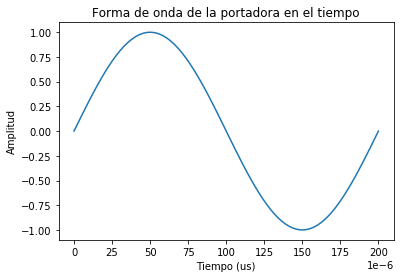

In [4]:
plt.plot(tp,sinus)
plt.ticklabel_format(axis = "x", style = "sci", scilimits=(-6,-6))
plt.xlabel("Tiempo (us)")
plt.ylabel("Amplitud")
plt.title('Forma de onda de la portadora en el tiempo')
plt.savefig("graficas/Forma_onda_portadora.png")

 Ahora graficamos la forma de onda para los dos bits posibles, primero definimos la frecuencia de mustreo, la linea temporal de transmision e inicializar el vector de la señal

In [5]:
# Definimos la frecuencia de muestreo
fs = p/T 

# Creamos la línea temporal para toda la señal Tx
t = np.linspace(0, N*T, N*p)

# Inicializar el vector de la señal
senal = np.zeros(t.shape)

Definimos la forma de modulación para la señal, la cual es de tipo BPSK, este tipo de modulacion define si el bit es 1 la fase de la señal de la portadora será 0 y si el bit a transmitir es 0 la fase de la señal portadora será 180, lo cual es igual a la señal portadora por -1.

In [6]:
for k,b in enumerate(bits):
    if b==1:
        senal[k*p:(k+1)*p]=sinus
    else:
        senal[k*p:(k+1)*p]=-sinus

Entonces ahora podemos visualizar la forma de onda modulada, para ello podemos graficar la onda transmitida para los primeros 5 bits, con lo que obtenemos lo siguiente:

La modulacion correspondiente para los primeros 10 bits modulados, los cuales son: [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]


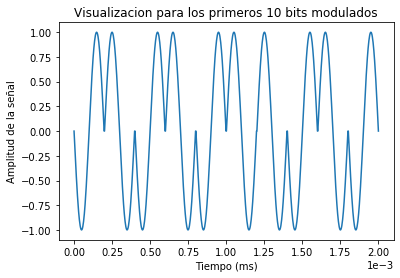

In [7]:
#Definimos la cantidad de bits a visualizar
p_Prueba=10

#Definimos la base de tiempo
tp = np.linspace(0, p_Prueba*T, p_Prueba*p)

#Graficamos
plt.figure()
plt.plot
plt.plot(tp, senal[0:p_Prueba*p])
plt.ticklabel_format(axis = "x", style = "sci", scilimits=(-3,-3))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud de la señal")
plt.title("Visualizacion para los primeros "+str(p_Prueba)+" bits modulados")
plt.savefig('graficas/modulado.png')

print("La modulacion correspondiente para los primeros " +str(p_Prueba)+ " bits modulados, los cuales son:",bits[0:p_Prueba])

#### 2. Potencia promedio de la señal modulada generada
Para este caso emplamos la funcion `integrate.trapz`, para calcular la potencia promedio de la señal

In [8]:
#Calculo de la potencia intantanea
P_ins = senal**2
#Potencia promedio
Pot_signal = integrate.trapz(P_ins, t) / (N*T)

print("La potencia de la señal es:"+str(Pot_signal)+" W")

La potencia de la señal es:0.4937506171882715 W


#### 3, 4, 5: En esta sección se realiza la simulación de canal ruidoso del tipo AWGN, con SNR desde -2 dB hasta 3 dB, además se grafica la densidad espectral de potencia de la señal con el método de Welch, y se realiza la demodulación de la señaal recibida.

Para ello se trabaja dentro de un `for` el cual recorre los valores que toma el parámetro SNR (relación señal-a-ruido), primero calculamos la densidad espectral para la señal para antes del canal ruidoso. 

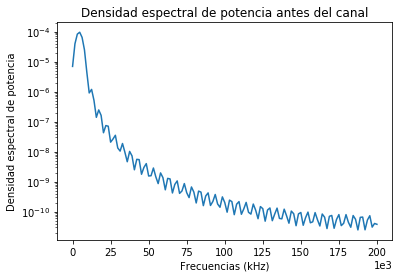

In [9]:
#Densidad espectral antes del canal
fw, PSD = signal.welch(senal, fs)
plt.figure()
plt.semilogy(fw, PSD)
plt.xlabel("Frecuencias (kHz)")
plt.ylabel("Densidad espectral de potencia")
plt.title("Densidad espectral de potencia antes del canal")
plt.ticklabel_format(axis = "x", style = "sci", scilimits=(3,3))
plt.savefig("graficas/espectro_antes_canal.png")

Definimos la función decodificadora, la cual recibe el valor de la pseudo-energía de la onda recibida (Ep), y establecemos un criterio de evaluación basado en el criterio de producto interno, donde si las funciones son ortogonales su valor es cero, por lo tanto establecemos como criterio de comparación un cero ya que si "Ep" es igual a cero este será ortogonal a la onda original entonces equivale a un bit "0", lo cual es caso contrario para "Ep" mayor que cero, el cual equivale a un bit "1"

In [10]:
def demodular(Ep):
    if Ep>0:
        return 1
    else:
        return 0        

Ciclo for para cada valor de SNR, desde -2 dB hasta 3 dB

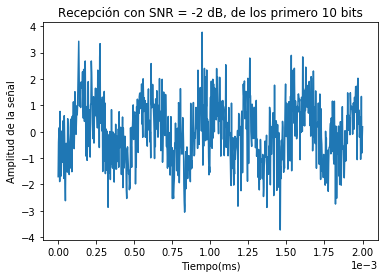

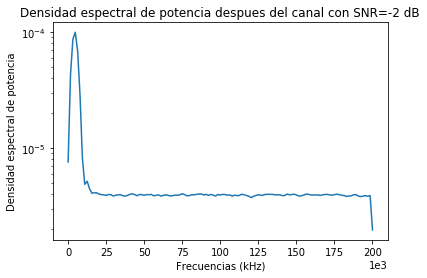

La tasa de error, para un SNR=-2, es:  0.0


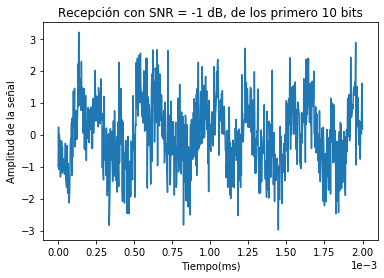

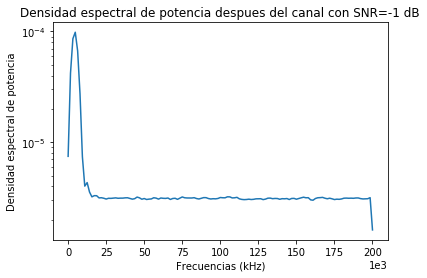

La tasa de error, para un SNR=-1, es:  0.0


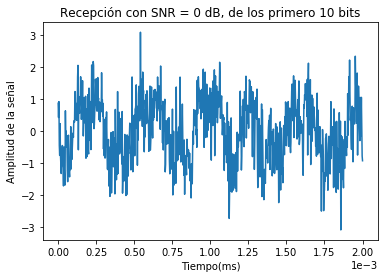

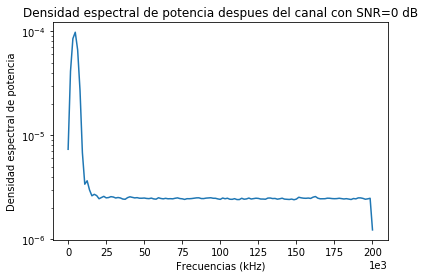

La tasa de error, para un SNR=0, es:  0.0


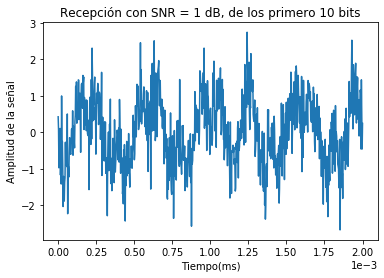

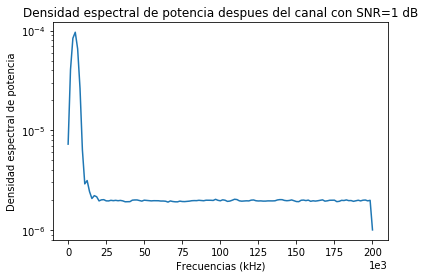

La tasa de error, para un SNR=1, es:  0.0


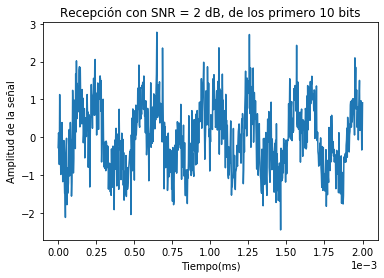

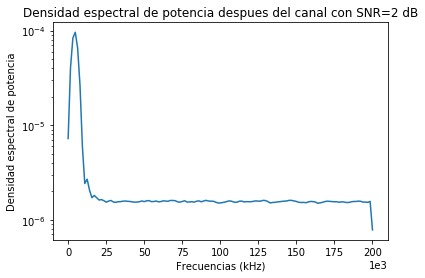

La tasa de error, para un SNR=2, es:  0.0


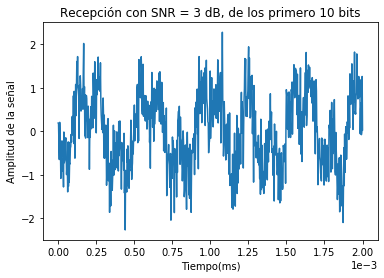

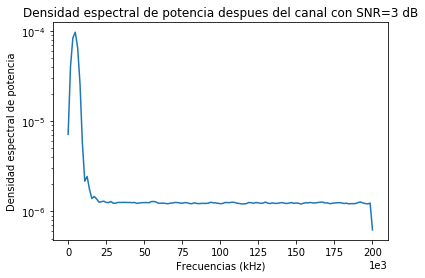

La tasa de error, para un SNR=3, es:  0.0


In [11]:
#Definimos una lista que contiene los valores de BER para el punto 6
BER=[]

#Creamos el ciclo for para cada valor de SNR
for SNR in range(-2,4):
    
    #Calculamos la potencia del ruido:
    p_ruido=Pot_signal/(10**(SNR/10))
    
    #Calculamos la variaza como:
    sigma_ruido=np.sqrt(p_ruido)
    
    #Creamos el ruido, para la vrianza dada:
    ruido=np.random.normal(0,sigma_ruido,senal.shape)    
    
    #Simulamos el canal
    RX = senal+ruido
    
    #Entonces ahora visualizamos los primeros bits recibidos:
    plt.figure()
    plt.plot(tp,RX[0:p*p_Prueba])
    plt.xlabel("Tiempo(ms)")
    plt.ylabel("Amplitud de la señal")
    plt.title("Recepción con SNR = "+str(SNR)+ " dB, de los primero "+str(p_Prueba)+" bits" )
    plt.ticklabel_format(axis = "x", style = "sci", scilimits=(-3,-3))
    plt.savefig("graficas/RX_para_SNR_"+str(SNR)+".png")
    plt.show()
    
    
    #Ahora graficamos la densidad espectral para cada SNR
    
    fw, PSD = signal.welch(RX, fs)
    plt.figure()
    plt.semilogy(fw, PSD)
    plt.xlabel("Frecuencias (kHz)")
    plt.ylabel("Densidad espectral de potencia")
    plt.title("Densidad espectral de potencia despues del canal con SNR="+str(SNR)+" dB")
    plt.ticklabel_format(axis = "x", style = "sci", scilimits=(3,3))
    plt.savefig("graficas/espectro_despues_canal_SNR_"+str(SNR)+".png")
    plt.show()
    
    # Pseudo-energía de la onda original
    Es = np.sum(sinus**2)  #Se calcula aunque no es necesario

    #Inicializamos del vector de bits recibidos
    bitsRX = np.zeros(len(bits))
    
    # Decodificación de la señal por detección de energía
    for k, b in enumerate(bits):
        Ep = np.sum(RX[k*p:(k+1)*p] * sinus)
        bitsRX[k]=demodular(Ep)
    
    err = np.sum(np.abs(bits - bitsRX))
    BER.append(err/N)
    print("La tasa de error, para un SNR="+str(SNR)+", es: ",err/N)

#### 6. Grafica de BER versus SNR
En esta sección calculamos la gráfica de tasa de error contra la relación de señal ruido.

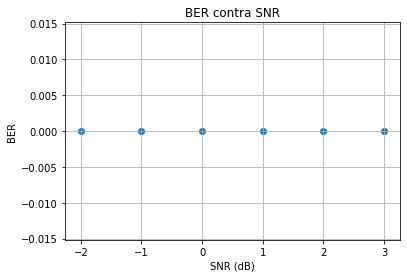

In [12]:
#definimos el vector de SNR con los valores solicitados
snr=[b for b in range(-2,4)]

#Graficamos empleando el metodo scatter
plt.scatter(snr, BER)
plt.title("BER contra SNR")
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.savefig("graficas/BER_vs_SNR.png")
plt.grid()
plt.show()